### PROGRESSIVE GROWING OF GANS FOR IMPROVED QUALITY , STABILITY , AND VARIATION

By: Tero Karras, Timo Aila, Samuli Laine, Jaakko Lehtinen

https://arxiv.org/abs/1710.10196

Implemented by: Deniz A. ACAR & Selcuk Sezer


This paper is basically a training methodology for generative adverserial networks (GAN). The main idea here is to start training the adverserial networks from low resolutions to high resolutions progressively. In other words the paper suggests to construct a GAN using two simple blocks as generator and discriminator in such a way that initially it tries to generate a 4x4 image. After that add new layers progressively to generate higher resolution image.

How this feat is achieved can be percieved in the following figure. 

As it can be seen initially the generator creates 4x4 images and after training is done a block is added to generator and discriminator to generate 8x8 images and so on. 

![title](main/1.png)

This incremental nature allows the training to first discover large-scale structure of the
image distribution and then shift attention to increasingly finer scale detail, instead of having to learn
all scales simultaneously. This on the other hand would make the training more stable and because there is less information to be learned and there are fewer modes as a result.

In this project we have implemented the network that is used in the paper to generate high resolution images trained on CelebA_HQ dataset. The architecture and methododlogy that we have implemented can be seen below:


![title](main/3.png)

There are some interesting ideas which we will discuss here briefly.

### EQUALIZED LEARNING RATE

It is one of the fascinating ideas in the paper. 

Optimization methods like ADAM and RMSPROP normalize a gradient update by its estimated standard deviation, as a result parameters get updated independent of the scale. In orther to make the updating dependent on the scale what the authors basically do in the paper is to initialize the weight matrix from normal distribution. then scale the weights at the runtime by the per-layer normalization constant (c) from He's initializer. 

In other words the scale the weights in the forward pass by multiplying the weight with c.

### PIXELWISE FEATURE VECTOR NORMALIZATION IN GENERATOR

In order to restrict the magnitude of the weights in generator -so that- they do not get out of control due to the competition between generator and discriminator, they are normalize by local response normalization. 

![title](main/5.png)

### INCREASING VARIATION USING MINIBATCH STANDARD DEVIATION

GANs have a tendency to capture only a subset of the variation found in training data, and Salimans
et al. (2016) suggest “minibatch discrimination” as a solution. They compute feature statistics not
only from individual images but also across the minibatch, thus encouraging the minibatches of
generated and training images to show similar statistics. This is implemented by adding a minibatch
layer towards the end of the discriminator, where the layer learns a large tensor that projects the
input activation to an array of statistics.

Here the authors first compute standard deviation for each feature in each spatial location over the minibatch, then average these estimates over all features and spatial locations to obtain a single value for each subgroup. Then this values is replicated for the images in that subgroup in the minibatch and the result is concatinated the the input.

### TRANSITION

When adding a new block to the generator and discriminator (which are the exact mirror of each other) 
they are fed in smoothly which is represented below:

![title](main/transition.png)

The value $\alpha$ increases gradually at each epoch until it reaches 1.

### GENERATOR and DISCRIMINATOR

The generator architecture can be seen below:

![title](main/gen.png)

![title](main/dis.png)

reference: https://towardsdatascience.com/progan-how-nvidia-generated-images-of-unprecedented-quality-51c98ec2cbd2

and these are the results that they have obtained in the reference above:

![title](main/res.gif)



We have implemented the project as python files rather than in jupyter (which we initially did for version 1 implementation).

We have decided to do so due to our limited resources.

### Challenges:
[UPDATE]

We have found a mistake in our code; The discriminator sub-blocks do not have normalization layers. we have fixed the problem and started training the networks again. (hopefully it will solve the training problems we faced before.)

We have aimed to generate imges with 128x128 resolution which due to hardware deficiencies was not acheived. We also have struggled to get satisfying results for a 64x64 image. During our first attempt we have encountered mode collapse. Which we believe was a result of selecting a large learning rate. 

The reason that we selected a large learning rate instead of what was proposed in the paper was that after even 400 epochs we did not observe any significant changes in 4x4 images.

We have tried to use changing learning rate. We have used 0.128 / resolution which performed quite well on the blocks until we reach the level that generated 64x64 images. We did not see any significant changes even after about 15 hours of training we have also tried different transition configurations to no avail. At this point we suspect it takes way more time to train the GAN with 64x64 than we spend on the training. 

Another problem that we faced after completing the code was that the generator would generate black images (4x4) no matter how many epochs has passed. we have tried to debug the code but it turns out that the learning rate given by the authors was very small. We spend quite a long time on trying to fix this problem which was easily solved by increasing the learning rate. 

One other interesting problem that we faced was due to implementation of equilized learning rate. Which was not sent to the device even after being added to nn.Sequential. Our solution was to send it to the device of its input in the forward method of its class.

INCREASING VARIATION USING MINIBATCH STANDARD DEVIATION was explained briefly in the paper but there was no information about its details so that we could refer to and implement it. We have used GAN ZOO implementation in the code.

We have lost quite a lot of time in debugging (as explianed) and training the 64x64 generator. 

Our results can be seen below:

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('{}/src/'.format(os.getcwd())))

config = {'channels':[128,128,128,128,128,128,128], # must be len(config['sr]) + 1 
          'latent_size':128, 
          'sr':[4, 8, 16, 32, 64, 128], # spatial resolution
          'start_sr':4,
          'level_batch_size':[16, 16, 16, 16, 16, 16],
          'epochs_before_jump':[16, 15, 15, 15, 15, 15], 
          'learning_rate_generator':0.1,
          'learning_rate_critic':0.1, 
          'generator_betas':(0.0, 0.99), 
          'critic_betas':(0.0, 0.99), 
          'ncrit':1, 
          'critic_lambda':10.,
          'epsilon_drift':0.001,
          'dataset_dir':'/home/deniz/Desktop/data_set/CelebAMask-HQ/', 
          'stat_format':'epoch {:4d} resolution {:4d} critic_loss {:6.4f} generator_loss {:6.4f} time {:6f}'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

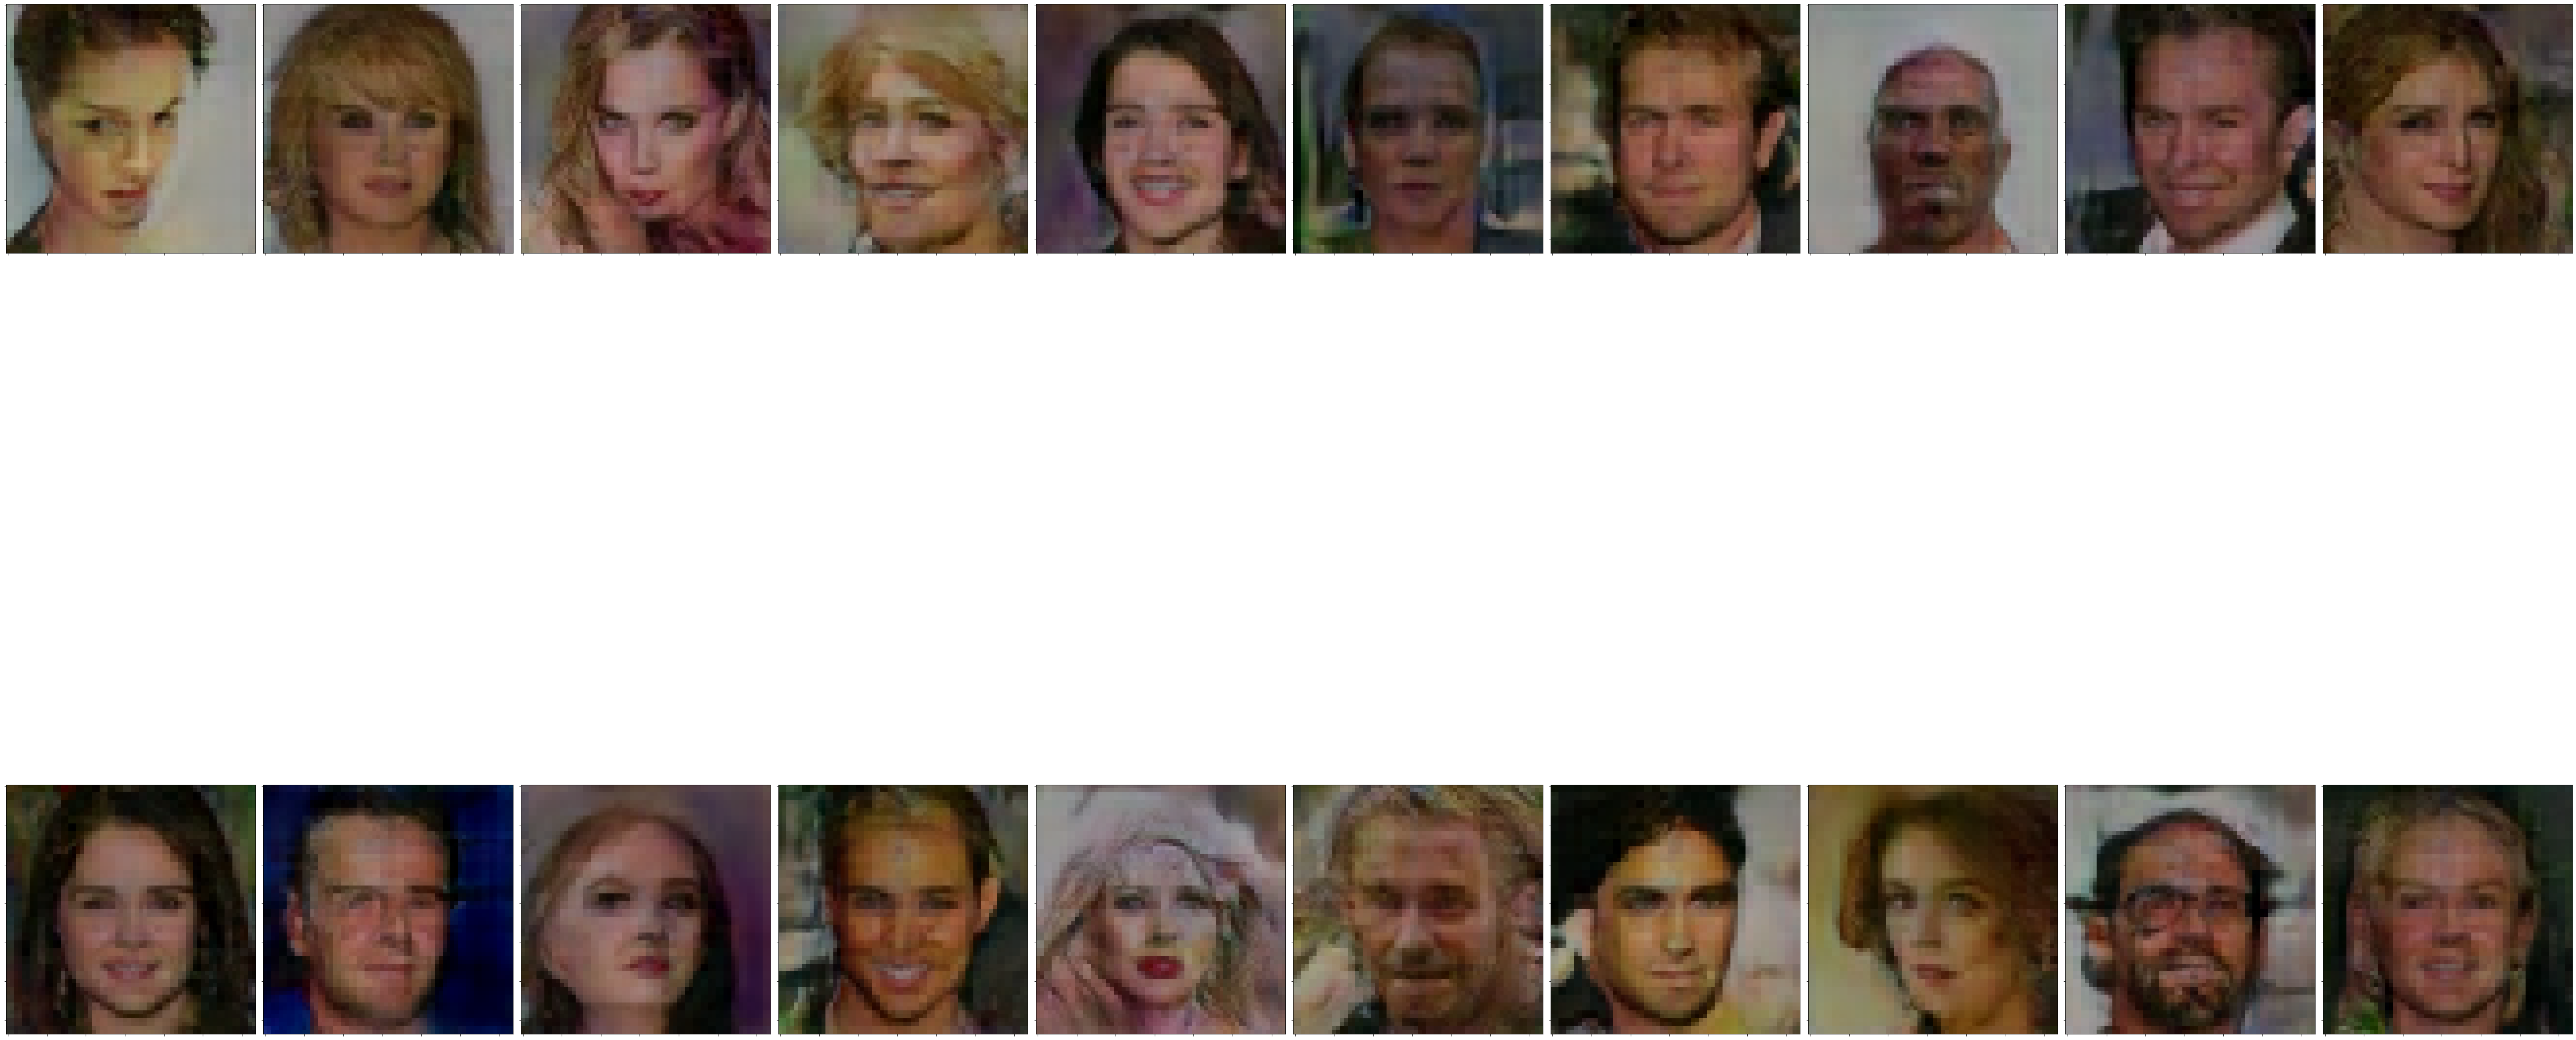

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from model.generator import Generator
from model.discriminator import Discriminator
from loss.WGANGP import PG_Gradient_Penalty
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor
from os import getcwd
from numpy import array, log2, linspace
from time import time


def show_img(d):
    plt.clf()
    h = 10
    s = d.shape[0]
    fig = plt.figure(figsize=(config['sr'][level_index], config['sr'][level_index]))
    m = int(s / h)
    ax = [plt.subplot(m+1,h,i) for i in range(1, s+1)]
    for i in range(1, s+1):
        plt.axis('on')
        ax[i-1].imshow(d[i-1,:,:], cmap='gray')
        ax[i-1].set_xticklabels([])
        ax[i-1].set_yticklabels([])
        ax[i-1].set_aspect('equal')

    fig.subplots_adjust(hspace=0, wspace=0.1)
    fig.tight_layout()
    plt.show(block=False)    
    plt.pause(10)
    plt.close()

    return

level_index = 4
device = torch.device('cuda:0')
generator = Generator(config['sr'][level_index], config, transition=True, save_checkpoint=False).to(device)

x = torch.randn(20, config['latent_size']).to(device)
a = generator(x) # .reshape(3, config['sr'][level_index], config['sr'][level_index])
image = array((a).tolist()).astype(int)
image = np.transpose(image, (0,2,3,1)) 
show_img(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

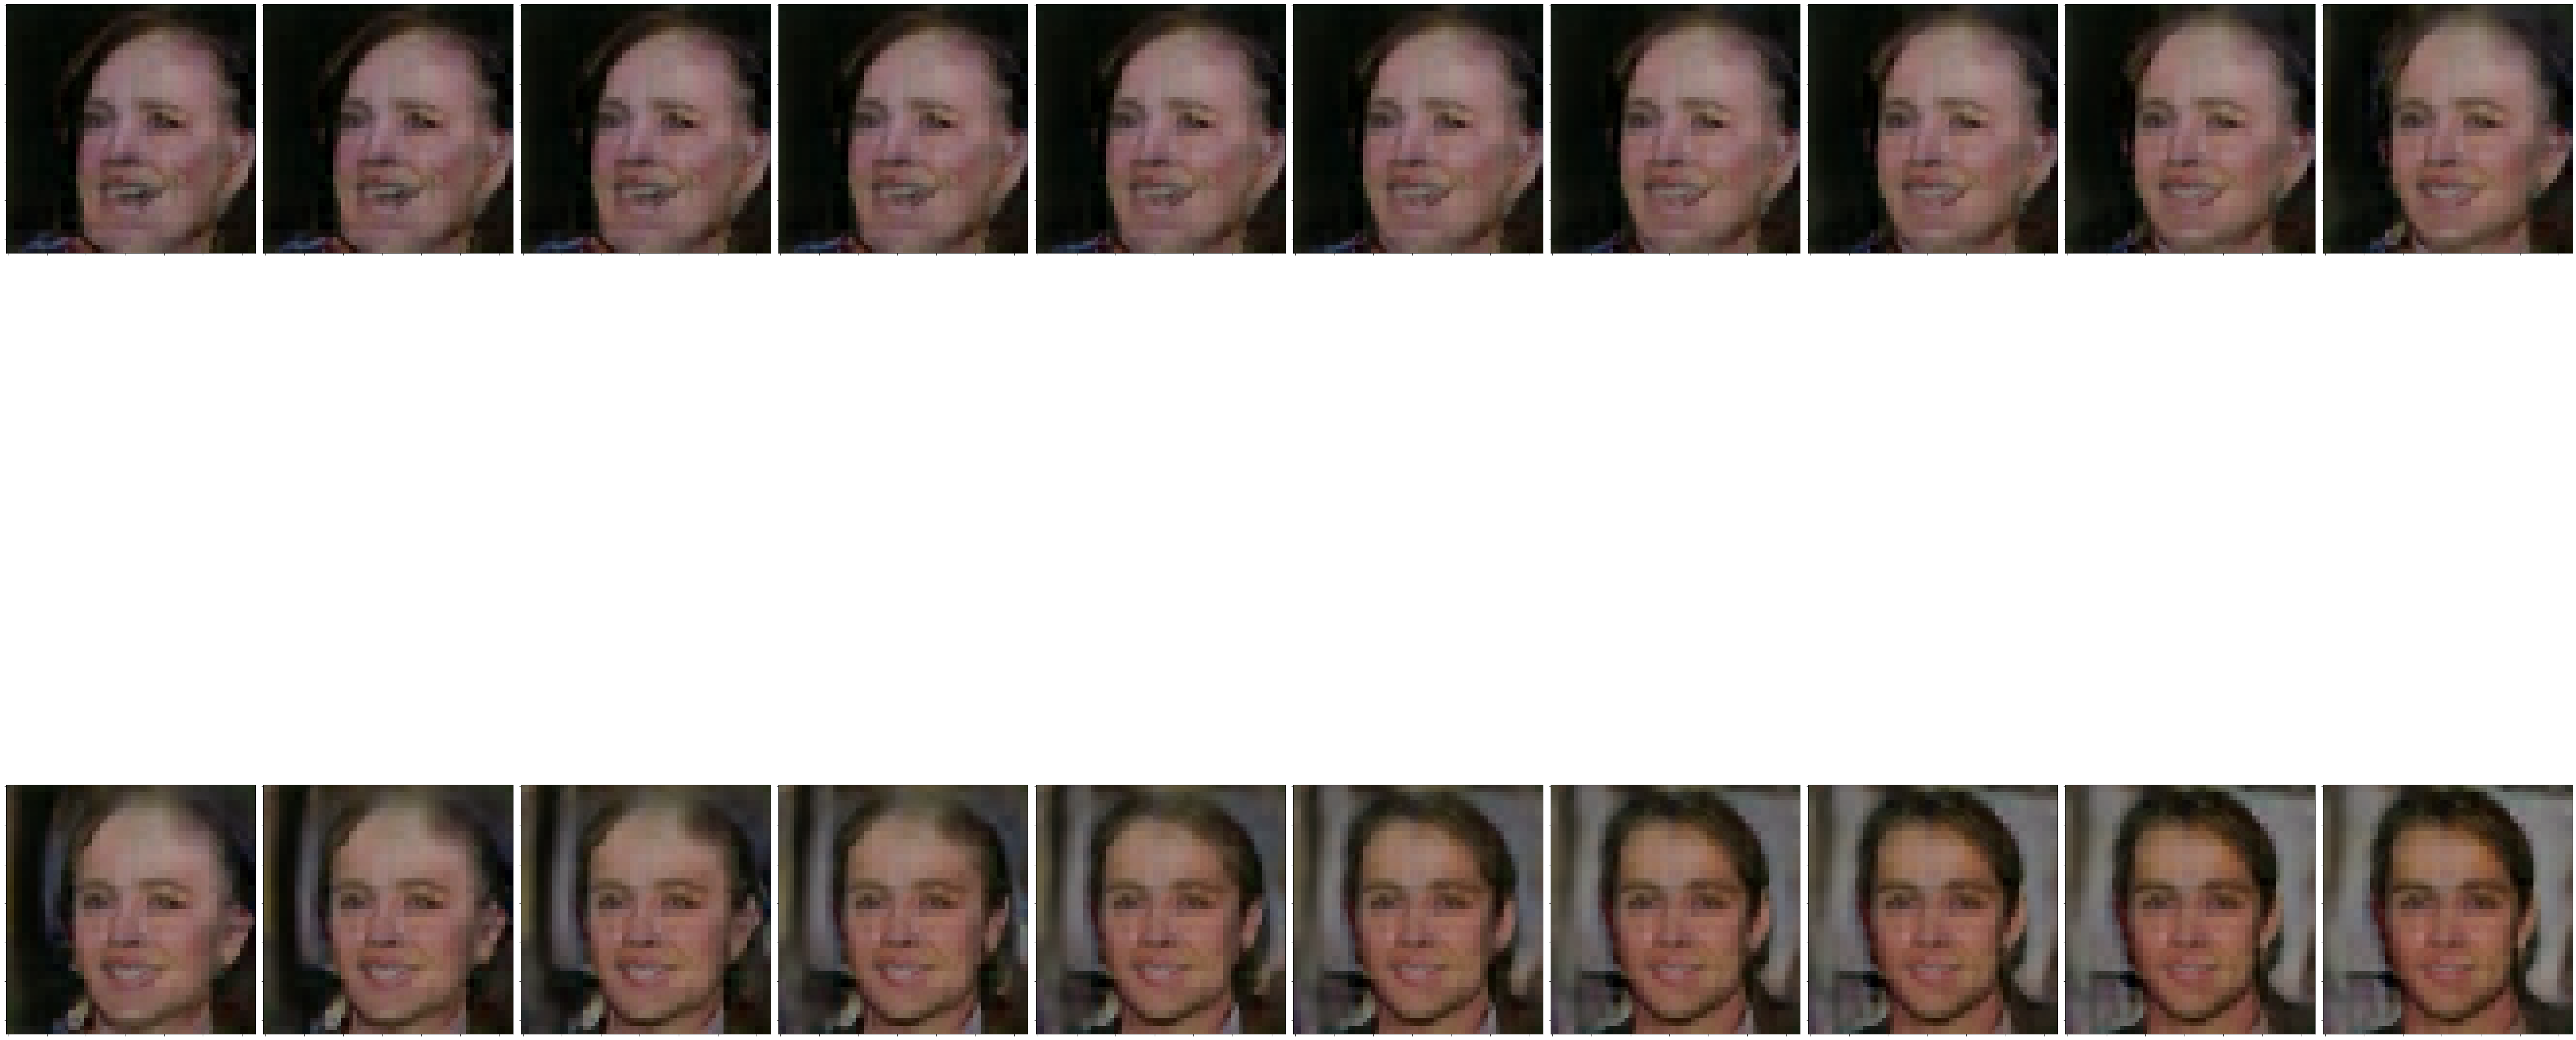

In [3]:
level_index = 4
device = torch.device('cuda:0')
generator = Generator(config['sr'][level_index], config, transition=True, save_checkpoint=False).to(device)

x1 = np.random.randn(config['latent_size'])
x2 = np.random.randn(config['latent_size'])

alpha = linspace(0.,1.,20)
d = []
for i in alpha:
    d.append(x1 * i + x2 * (1-i))

kk = torch.Tensor(array(d)).to(device)
a = generator(kk) # .reshape(3, config['sr'][level_index], config['sr'][level_index])
image = array((a).tolist()).astype(int)
image = np.transpose(image, (0,2,3,1)) 
show_img(image)

##  FID Score

For quantitative evaluation, FID score from https://github.com/bioinf-jku/TTUR is used.

In [ ]:
## Construct Fake Dataset
if not os.path.exists('./fake_dataset/'):
  os.mkdir('./fake_dataset')

real_data_path = '/CelebA_32/'
fake_data_path = '/fake_dataset/'
batch_in = 100
fake_dataset_size = 1000
latent_vars = torch.randn(fake_dataset_size, config['latent_size']).to(device)
im_ind = 0
# Generate fake images
for i in range(fake_dataset_size//batch_in):
  a = generator(latent_vars[i*batch_in:(i+1)*batch_in,:]) 
  images = array((a).tolist()).astype(int)
  images = np.transpose(images, (0,2,3,1)) 
  for image in images:
    im_name = str(im_ind)+'.jpg'
    image = np.clip(image,0,255.0)
    cv2.imwrite(fake_data_path+im_name, image)
    im_ind += 1


## Evaluate FID score 
!git clone https://github.com/bioinf-jku/TTUR.git ./FID
!python ./FID/fid.py ./CelebA_32 ./fake_dataset